In [1]:
# https://github.com/meenuagarwal/Linear-Regression-with-Boston-Housing-Dataset
# more detailed version at https://www.kaggle.com/venkataramarao/boston-house-sales-price-using-regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset from scikit-learn

In [2]:
from sklearn.datasets import load_boston
housing_data = load_boston()

**The dataset is a dictionary and now let's see its keys.**

In [3]:
print(housing_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Let's check description of the dataset
print (housing_data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Converting to Data Frame using Pandas**

In [5]:
boston = pd.DataFrame(housing_data.data)
#Assigning feature-names to colums of data frame
boston.columns = housing_data.feature_names
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adding the target column Price to the data frame
boston['Price'] = housing_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# Descriptive or Summary Statistic of the numeric columns
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Let's create some plots and visualize the dataset**

<AxesSubplot:>

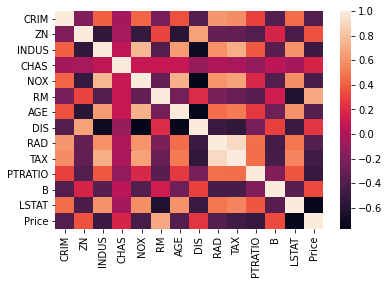

In [9]:
# Correlation between Different features
sns.heatmap(boston.corr())

/home/jbslanka/mypython/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

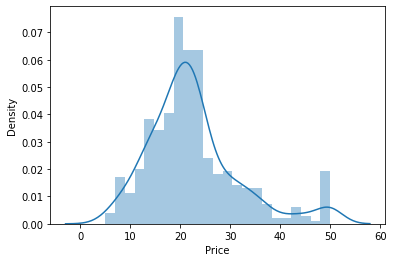

In [10]:
# Distributing of Price Column
sns.distplot(boston['Price'])

### Training a Linear Regression Model

In [11]:
# Creating Predictor variable 'X' and Target Variable 'y'

# X contains all the features except for the target value Price
X = boston.drop('Price', axis = 1)
y = boston['Price']

**Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

# X_train contains 70% of total dataset
print(X_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)

(354, 13)
(152, 13)


**Creating and training Model**

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
#Train/fit the model to training data
lr.fit(X_train,y_train)

LinearRegression()

**Let's evaluate the model by checking out it's intercept and coefficients.**

In [17]:
# print the intercept
print(lr.intercept_)

#Coefficients
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

25.469528442763103


,Coefficient
CRIM,-0.102245
ZN,0.031104
INDUS,0.014369
CHAS,1.659646
NOX,-15.869391
RM,5.032224
AGE,-0.000716
DIS,-1.313538
RAD,0.255945
TAX,-0.012337


Interpreting the coefficients:
<br>
Holding all other features fixed, a 1 unit increase in RM(average number of rooms per dwelling) is associated with an *increase of $5.032224 *. This can be extended for any feature and coefficient.

**Predictions from Model**

In [18]:
pred = lr.predict(X_test)

Text(0, 0.5, 'Predicted prices')

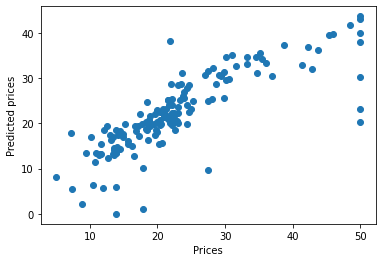

In [19]:
plt.scatter(y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

Ideally, the scatter plot should create a linear line. Since our linear model does not fit perfectly, the scatter plot is not creating a linear line.

**Regression evaluation metrics**
<br>
Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)

In [20]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.6789775344994324
MSE: 33.868033996670086
RMSE: 5.819624901715753


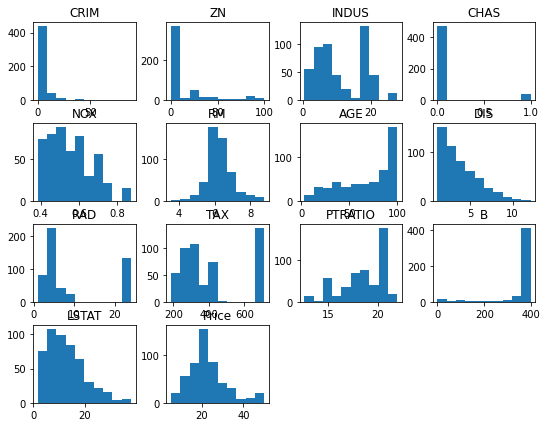

In [22]:
# histograms
boston.hist(bins=10,figsize=(9,7),grid=False);

In [23]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

regrRF = RandomForestRegressor(max_features=13, random_state=1)
regrRF.fit(X_train, y_train)
predRF = regrRF.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predRF))
print('MSE:', metrics.mean_squared_error(y_test, predRF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predRF)))

MAE: 2.562282894736843
MSE: 20.70724895394737
RMSE: 4.550521833146982


Review exercises:

1) Which model performed the best?  Thoughts on why?

2) Replace RandomForestRegressor with BaggingRegressor

How did the performance change?

3)  Compare altering hyperparameters